# 🚀 Introduction


# 🚀 Clustering: Application to Fashion MNIST

# 🚀 Djaber Achref 
In this example, we will use two clustering techniques to explore a unknown dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of datatset.

In [1]:
# Description: Add your explanation here.
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler
import kagglehub


c:\Users\Djaber\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download and Load the FashionMNIST Dataset using the `kagglehub` Package

In [14]:
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

# Load the dataset      

df = pd.read_csv(path+'/fashion-mnist_train.csv')

X = df.drop('label', axis=1)

y = df['label']

Path to dataset files: C:\Users\Djaber\.cache\kagglehub\datasets\zalando-research\fashionmnist\versions\4




## 🌟 🚀 A quick look to the dataset

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

The number of images = 60000
The number of classes = 10


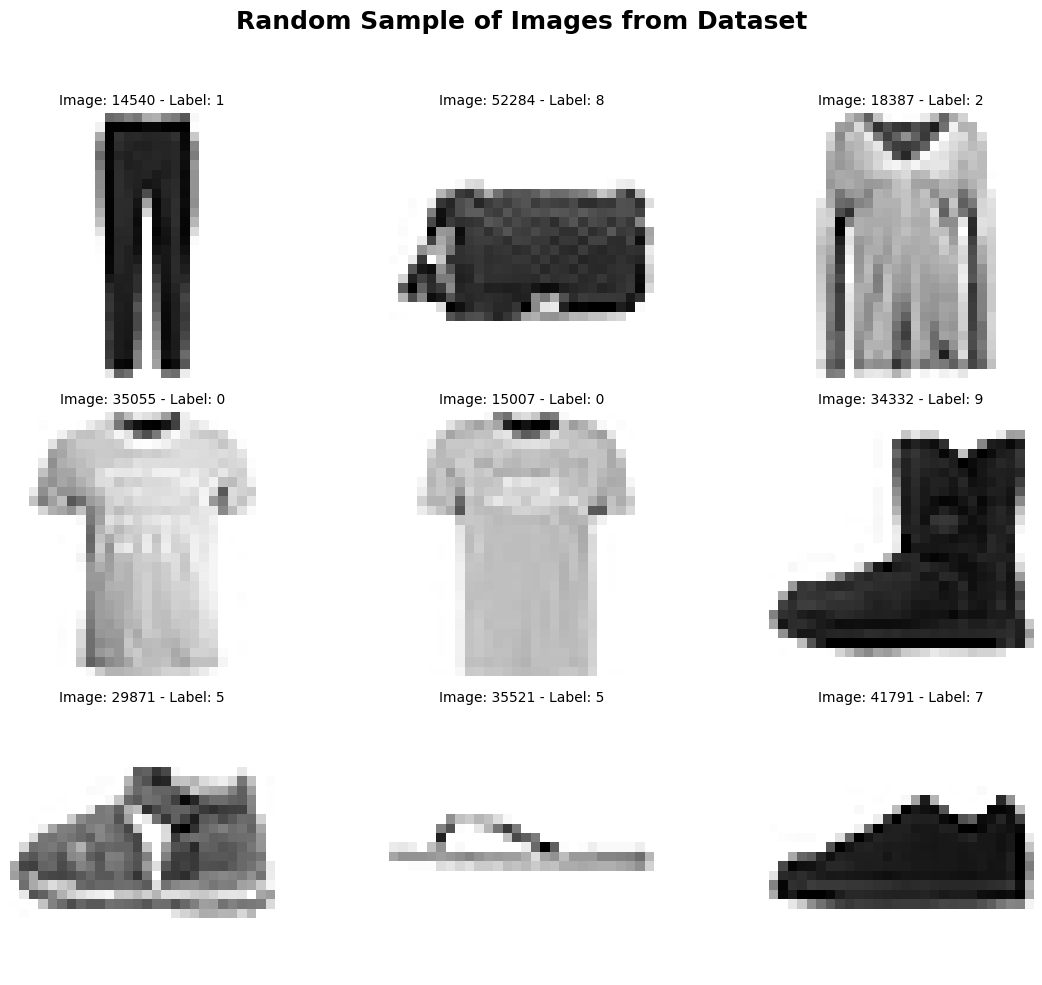

In [17]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size

print(f'The number of images = {number_images}')
print(f'The number of classes = {number_classes}')

# Improved grid visualization
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Random Sample of Images from Dataset', fontsize=18, fontweight='bold')

for ax in axes.flat:
    cur = np.random.randint(number_images)
    ax.imshow(Xn[cur].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    ax.set_title(f'Image: {cur} - Label: {yn[cur]}', fontsize=10)  # Adjusted to match 1D array indexing
    ax.axis('off')  # Hide axes for a cleaner look

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate main title
plt.show()



## 🌟 🚀 Preprocessing the dataset using PCA 

Now that we know very well PCA and it's ability to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Work to do :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.

The result of applying PCA on Fashion MNIST : Each principal component is a apotentially interpretable picture of what each vector is finding.


Work to do :
- For each of the 4 first components, print the corresponding "explained variance ratio". 
- Comment the pictures.

Original dimension of the dataset (before PCA) = (60000, 784)
Number of dimensions after PCA (90% variance) = (60000, 84)


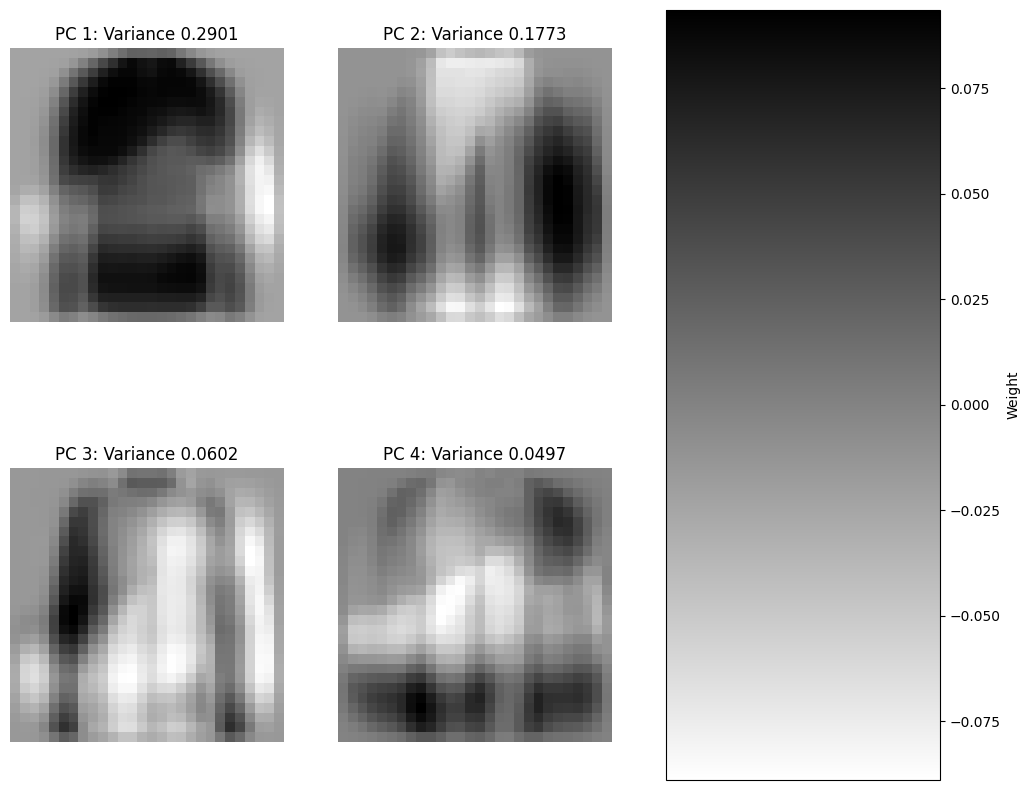

In [21]:
from sklearn.decomposition import PCA
from matplotlib.gridspec import GridSpec

# Apply PCA to the dataset
pca = PCA(0.90)  # Retain 90% of the variance
Xn_r = pca.fit_transform(Xn)  # Fit and transform the dataset

# Print dimensions before and after PCA
print("Original dimension of the dataset (before PCA) =", Xn.shape)
print("Number of dimensions after PCA (90% variance) =", Xn_r.shape)

# Improved visualization of the first 4 principal components
fig = plt.figure(figsize=(12, 10))
gs = GridSpec(2, 3, figure=fig)  # Create a grid with space for colorbar

# Add subplots for the first 4 components
axes = []
for i in range(4):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # Place in a 2x2 grid
    pc = pca.components_[i].reshape(28, 28)
    img = ax.imshow(pc, cmap='gray_r', interpolation='nearest')
    ax.set_title(f"PC {i+1}: Variance {pca.explained_variance_ratio_[i]:.4f}", fontsize=12)
    ax.axis('off')
    axes.append(ax)

# Add a colorbar to the right
cbar_ax = fig.add_subplot(gs[:, 2])  # Use the last column for the colorbar
fig.colorbar(img, cax=cbar_ax, orientation='vertical', label='Weight')



# 🚀 Introduction


## 🌟 🚀 K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".

Use for that: The package "sklearn.cluster" (from sklearn.cluster import KMeans)

In [22]:
# Description: Add your explanation here.
from sklearn.cluster import KMeans
target_nb_clusts = 1000

# COMPLETE THE CODE HERE...

k_means = KMeans(target_nb_clusts,random_state=0)# COMPLETE THE CODE HERE...
k_means.fit(Xn_r)   # COMPLETE THE CODE HERE...

nb_clusts =k_means.cluster_centers_.shape[0]
print("The numbers of k-means resulting clusters is ", nb_clusts)

The numbers of k-means resulting clusters is  1000



### 🔹 🌟 🚀 Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts**lists named **cluster_index**, where:
- **cluster_index[i]**contains the indices from **X**of vectors that belong to cluster # 🚀 **i**.

In [23]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)



# In order to assess the quality of produced clusters, here we will visualize the content of few clusters.

Number of images in cluster 2: 88


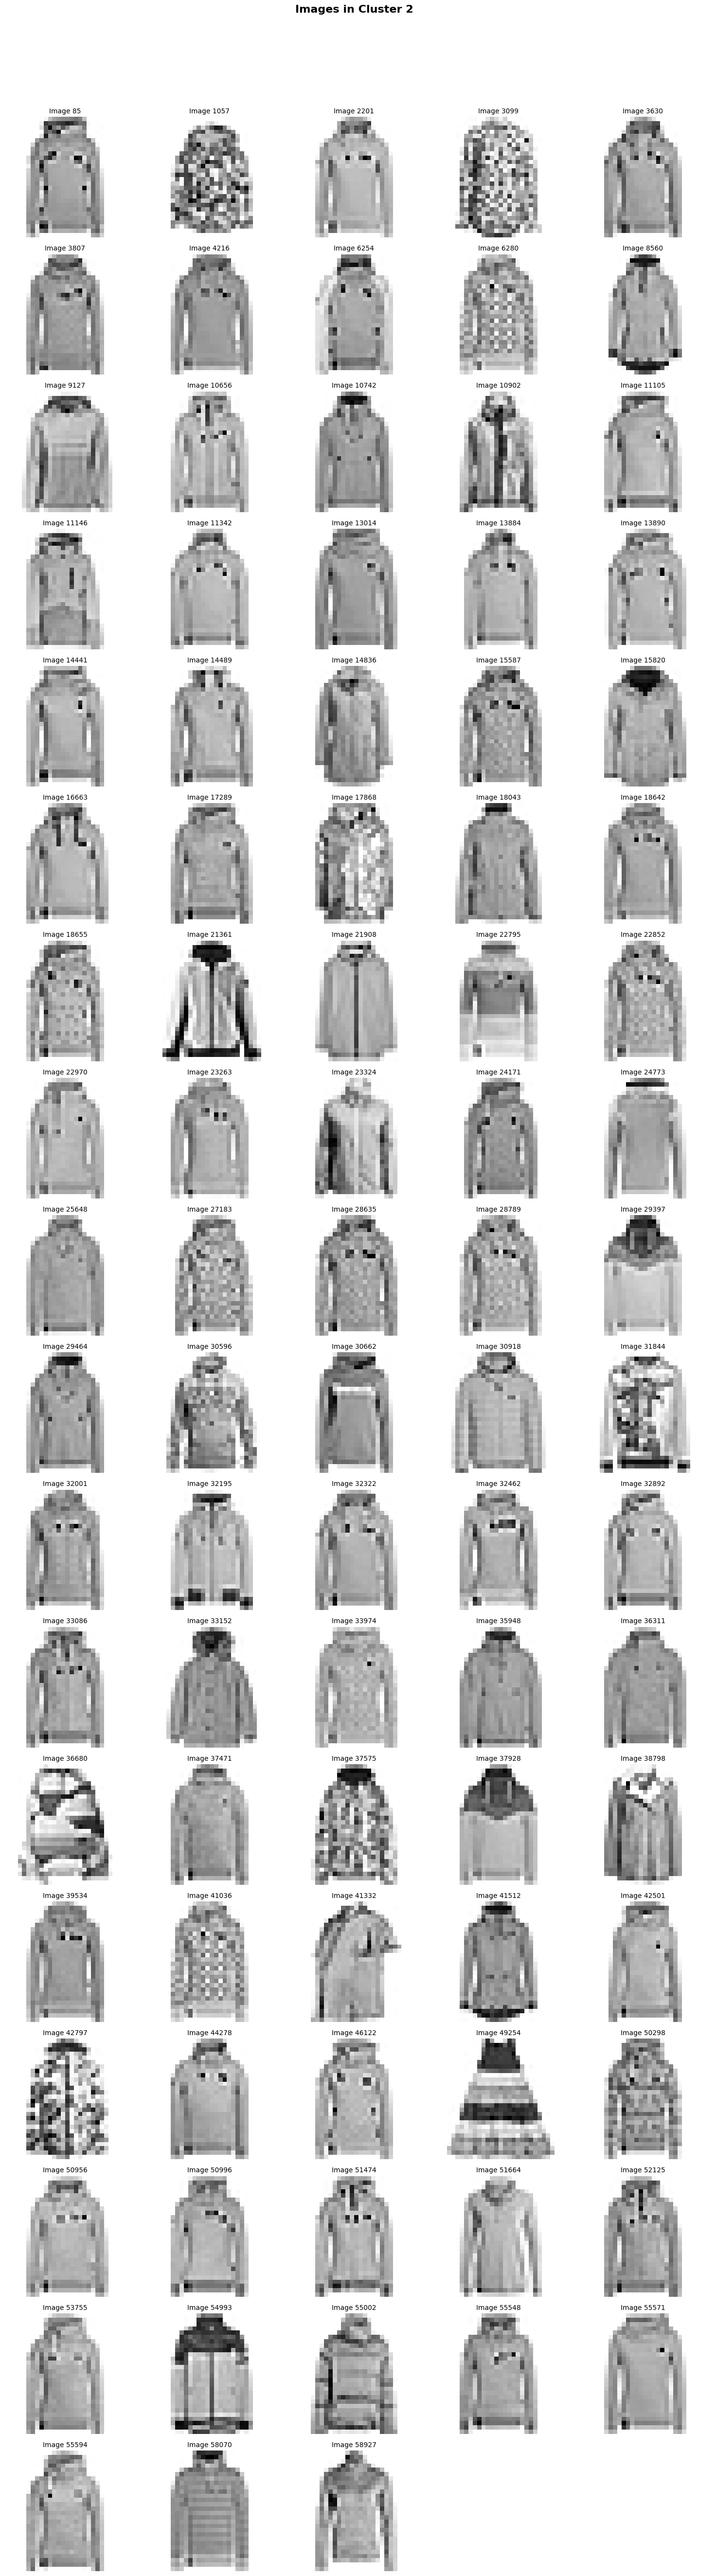

In [25]:
clust = 2  # ID of cluster to visualize

# Get indices of images in the specified cluster
clusterI = cluster_index[clust]  # COMPLETE THE CODE HERE...

# Define the number of images to visualize
num_images = len(clusterI)
print(f"Number of images in cluster {clust}: {num_images}")

# Set up grid size for visualization
cols = 5  # Number of columns in the grid
rows = (num_images // cols) + int(num_images % cols > 0)  # Calculate rows dynamically

# Create a grid layout for displaying images
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
fig.suptitle(f"Images in Cluster {clust}", fontsize=16, fontweight='bold')

# Populate the grid with images
for idx, ax in enumerate(axes.flat):
    if idx < num_images:
        img_index = clusterI[idx]
        ax.imshow(Xn[img_index].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        ax.set_title(f"Image {img_index}", fontsize=10)
        ax.axis('off')  # Hide axes for a cleaner look
    else:
        ax.axis('off')  # Hide any unused grid cells

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


# We can even plot the histogram of the class labels of vectors contained in the cluster.



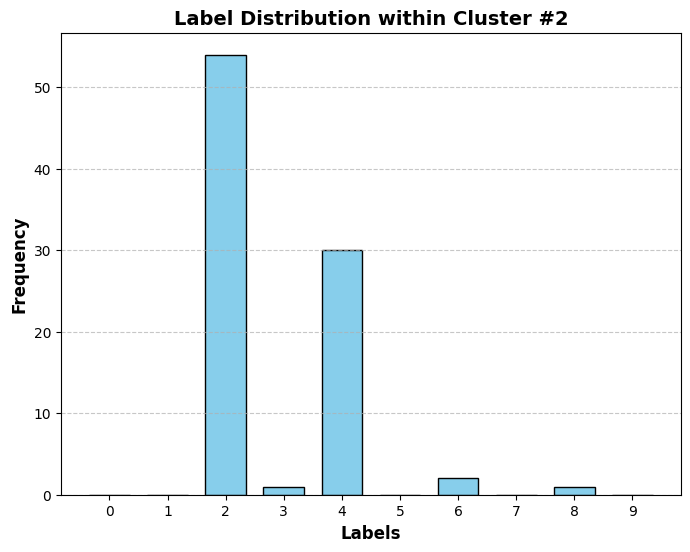

In [27]:
# Get the number of images in the cluster
s = len(clusterI)

# Create and fill an array "clusterL" with the labels of images belonging to the cluster
clusterL = np.zeros(s, dtype=int)
for i in range(s):
    clusterL[i] = yn[clusterI[i]]

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(clusterL, bins=np.arange(11) - 0.5, rwidth=0.7, align='mid', color='skyblue', edgecolor='black')

# Adding grid, labels, and title
plt.xticks(range(10), fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Labels', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Label Distribution within Cluster #{clust}', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



# 🚀 Introduction


## 🌟 🚀 Your analysis here:

In [ ]:
# Description: Add your explanation here.
ici on remarque que nos  images  contenus dans deux classe differentes (classe : Robe , Pantalon) , donc 
le cluster n''est pas parfait , car il y a deux images qui ne represente pas la classe des Robes
 (ces deux images ressemblent a un robe))
et ça revient a les conditions initiales (le choix des centroides et le nombre de cluster)







 # 🚀 Kmeans without PCA

The number of k-means resulting clusters is 1000
Number of images in cluster #2: 40


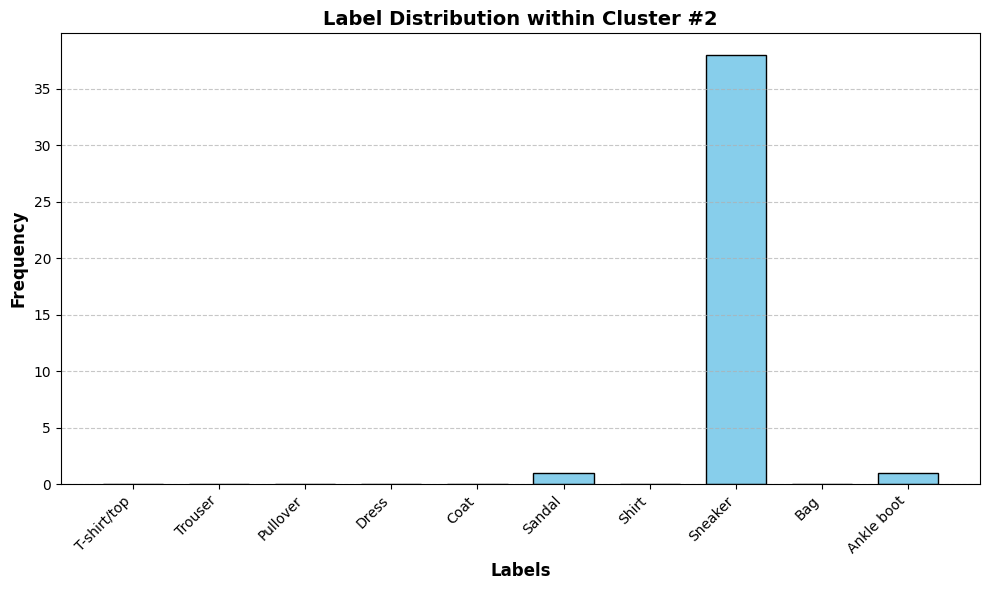

In [29]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Target number of clusters
target_nb_clusts = 1000

# Apply k-means clustering
k_means2 = KMeans(n_clusters=target_nb_clusts, random_state=0)  # COMPLETE THE CODE HERE...
k_means2.fit(Xn)  # Fit the clustering model on the dataset

# Get the number of resulting clusters
nb_clusts2 = k_means2.cluster_centers_.shape[0]
print("The number of k-means resulting clusters is", nb_clusts2)

# Create a 2D matrix for an array of indexes of the given label
cluster_index2 = [[] for _ in range(nb_clusts2)]

# Fill `cluster_index2` with the indices of images belonging to each cluster
for i in range(Xn.shape[0]):
    cluster_index2[k_means2.labels_[i]].append(i)

# Choose a cluster to visualize
clust = 2  # ID of the cluster
clusterI2 = cluster_index2[clust]  # Get indices of the cluster

print(f"Number of images in cluster #{clust}: {len(clusterI2)}")

# Prepare label data for visualization
s = len(clusterI2)
clusterL2 = np.zeros(s, dtype=int)

for i in range(s):
    clusterL2[i] = yn[clusterI2[i]]

# Define label names for visualization
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot histogram of labels within the cluster
plt.figure(figsize=(10, 6))
plt.hist(clusterL2, bins=np.arange(11) - 0.5, rwidth=0.7, align='mid', color='skyblue', edgecolor='black')

# Enhance the plot with labels, title, and grid
plt.xticks(range(10), label_names, rotation=45, fontsize=10, ha='right')  # Rotate labels for clarity
plt.yticks(fontsize=10)
plt.xlabel('Labels', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title(f'Label Distribution within Cluster #{clust}', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

plt.show()



# �� Kmeans with PCA
# 🚀 With PCA k=10

The number of k-means resulting clusters is 10


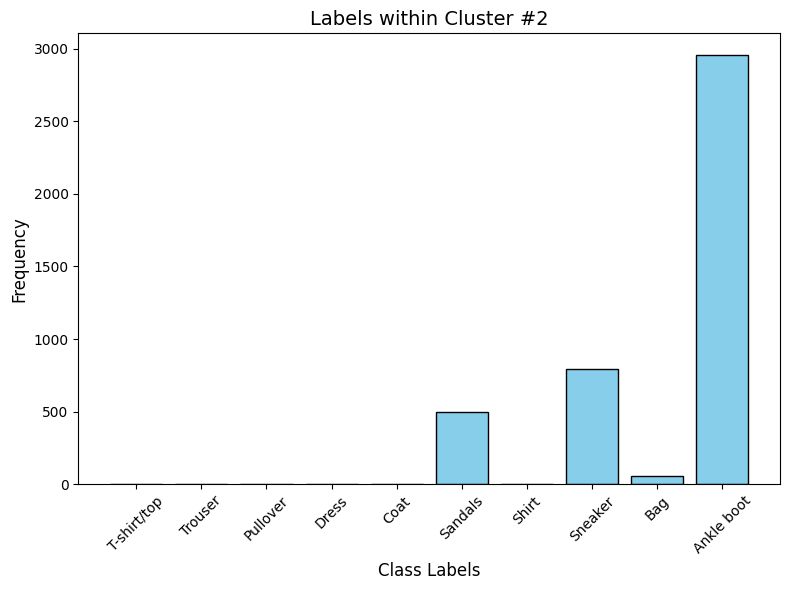

In [30]:
# Description: Add your explanation here.

from sklearn.cluster import KMeans
# Assuming Xn_r (features) and yn (true labels) are already defined

target_nb_clusts2 = 10  # Number of clusters to form

# Initialize KMeans with the target number of clusters and random state for reproducibility
k_means3 = KMeans(n_clusters=target_nb_clusts2, random_state=0)

# Fit the model to the data Xn_r
k_means3.fit(Xn_r)

# Get the number of clusters from the model (based on cluster centers)
nb_clusts3 = k_means3.cluster_centers_.shape[0]
print(f"The number of k-means resulting clusters is {nb_clusts3}")

# Create a list to hold indices of samples for each cluster
cluster_index3 = [[] for _ in range(nb_clusts3)]

# Assign each sample to its corresponding cluster
for i in range(Xn_r.shape[0]):
    cluster_index3[k_means3.labels_[i]].append(i)

# Select a cluster ID to visualize (e.g., cluster 2)
clust = 2
clusterI3 = cluster_index3[clust]

# Create an array to hold the true labels of images in the selected cluster
s = len(clusterI3)
clusterL3 = np.zeros(s)

# Fill the clusterL3 array with the true labels corresponding to the cluster indices
for i in range(s):
    clusterL3[i] = yn[clusterI3[i]]

# Plot the histogram of labels within the selected cluster
plt.figure(figsize=(8, 6))  # Increase figure size for better readability
plt.hist(clusterL3, bins=np.arange(11) - 0.5, rwidth=0.8, align='mid', color='skyblue', edgecolor='black')

# Set title and labels
plt.title(f'Labels within Cluster #{clust}', fontsize=14)
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve the x-axis ticks to display class names clearly
plt.xticks(np.arange(10), 
           ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], 
           rotation=45, fontsize=10)

# Tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()



# �� Kmeans with PCA

# 🚀 Without PCA k=10

The number of k-means resulting clusters is 10


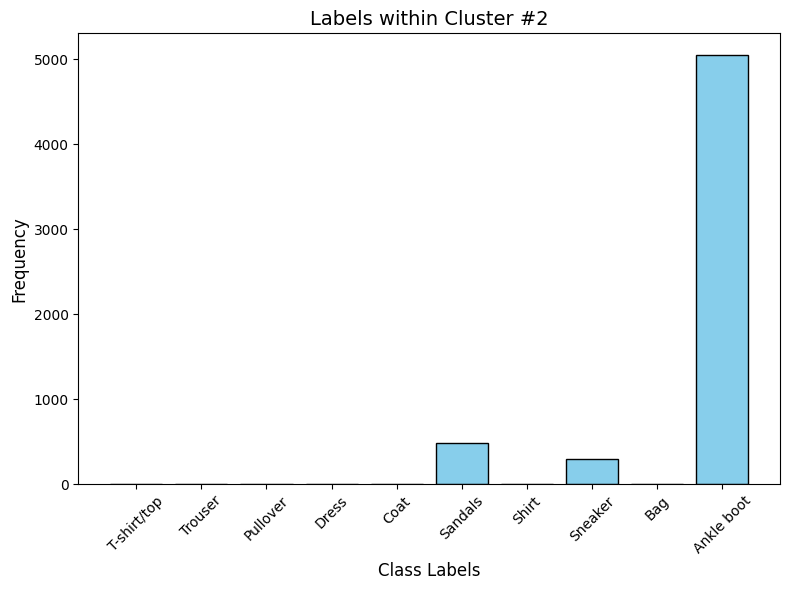

In [31]:
# Description: Add your explanation here.
from sklearn.cluster import KMeans

# Assuming Xn (features) and yn (true labels) are already defined

target_nb_clusts = 10  # Number of clusters to form

# Initialize KMeans with the target number of clusters and random state for reproducibility
k_means2 = KMeans(n_clusters=target_nb_clusts, random_state=0)

# Fit the KMeans model to the data Xn
k_means2.fit(Xn)

# Get the number of clusters from the model (based on cluster centers)
nb_clusts2 = k_means2.cluster_centers_.shape[0]
print(f"The number of k-means resulting clusters is {nb_clusts2}")

# Create a list to hold indices of samples for each cluster
cluster_index2 = [[] for _ in range(nb_clusts2)]

# Assign each sample to its corresponding cluster
for i in range(Xn.shape[0]):
    cluster_index2[k_means2.labels_[i]].append(i)

# Select a cluster ID to visualize (e.g., cluster 2)
clust = 2
clusterI2 = cluster_index2[clust]

# Create an array to hold the true labels of images in the selected cluster
s = len(clusterI2)
clusterL2 = np.zeros(s)

# Fill the clusterL2 array with the true labels corresponding to the cluster indices
for i in range(s):
    clusterL2[i] = yn[clusterI2[i]]

# Plot the histogram of labels within the selected cluster
plt.figure(figsize=(8, 6))  # Increase figure size for better readability
plt.hist(clusterL2, bins=np.arange(11) - 0.5, rwidth=0.8, align='mid', color='skyblue', edgecolor='black')

# Set title and labels
plt.title(f'Labels within Cluster #{clust}', fontsize=14)
plt.xlabel('Class Labels', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve the x-axis ticks to display class names clearly
plt.xticks(np.arange(10), 
           ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], 
           rotation=45, fontsize=10)

# Tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()